In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Загрузка данных

In [2]:
data_path = r"../data/bankruptcy_data.csv"
data = pd.read_csv(data_path, index_col=0)

In [ ]:
data.head(10)

In [6]:
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846300 entries, 0 to 3104783
Data columns (total 40 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   Наименование                                       2846300 non-null  object 
 1   Регистрационный номер                              2846300 non-null  float64
 2   Код налогоплательщика                              2846300 non-null  float64
 3   Вид деятельности/отрасль                           2846300 non-null  object 
 4   Код основного вида деятельности                    2846300 non-null  object 
 5   Организационно-правовая форма                      2846300 non-null  object 
 6   Форма собственности                                2846300 non-null  object 
 7   Размер компании                                    2846258 non-null  object 
 8   Важная информация                                  337634 non-

# Обработка данных

In [3]:
def preprocess_data(data):

    data.reset_index(inplace = True)

    data.drop(["Наименование", "Регистрационный номер", "Код налогоплательщика", "Код основного вида деятельности"], axis = 1, inplace = True)

    data["Вид деятельности/отрасль"] = data["Вид деятельности/отрасль"].astype("category").cat.codes
    data["Организационно-правовая форма"] = data["Организационно-правовая форма"].astype("category").cat.codes
    data["Форма собственности"] = data["Форма собственности"].astype("category").cat.codes
    data["Размер компании"] = data["Размер компании"].astype("category").cat.codes

    data.fillna(0, inplace = True)

    data["Важная информация"].where(data["Важная информация"] == 0, other = 1, inplace = True)
    data["Важная информация"] = data["Важная информация"].astype("int8")

    X = data.drop("Банкротство", axis = 1)
    y = data["Банкротство"]
    
    return X, y

In [4]:
X, y = preprocess_data(data)

In [5]:
def split_data(X, y, train_size):

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size)

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, 0.7)

# Обучение модели

In [ ]:
model = LogisticRegression(penalty = "l2", solver="lbfgs", multi_class = "ovr",
                           n_jobs = 3, verbose = 1).fit(X_train, y_train)

In [ ]:
y_train_result = model.predict_proba(x_train)
print(y_train_result.shape)

(1992409, 4)


In [ ]:
#y_train_proba = model.predict_proba(x_train)[:, 1]
y_train_proba = model.predict_proba(x_train)
y_test_proba = model.predict_proba(x_test)

In [ ]:
max_index_func = lambda arr: np.argmax(arr)
tmp = []
for row in y_test_proba:
    tmp.append(max_index_func(row))

y_test_proba_new = np.array(tmp)

In [ ]:
nonzero = np.where(y_test_proba_new != 0)
print(np.array(nonzero).reshape(-1).shape)

(231,)


# Оценка модели

In [ ]:
from sklearn.metrics import precision, recall, f1_score

In [ ]:
print(f"Train roc-auc: {roc_auc_score(y_true = y_train, y_score = y_train_proba, average = 'macro', multi_class = 'ovo')}")
print(f"Test roc-auc: {roc_auc_score(y_true = y_test, y_score = y_test_proba, average = 'macro', multi_class = 'ovo')}")


Train roc-auc: 0.8912228966560886
Test roc-auc: 0.8908657485908392


In [ ]:
def plot_weights(weights,names,model_type):
    

    feature_weights = np.array(weights)
    feature_names = np.array(names)
    

    data={'feature_names':feature_names,'feature_weights':feature_weights}
    fi_df = pd.DataFrame(data)
    

    fi_df.sort_values(by=['feature_weights'], ascending=False,inplace=True)
    

    plt.figure(figsize=(20,40))

    sns.barplot(x=fi_df['feature_weights'], y=fi_df['feature_names'])

    plt.title(model_type + ' Weights')
    plt.xlabel('Weights')
    plt.ylabel('Feature names')

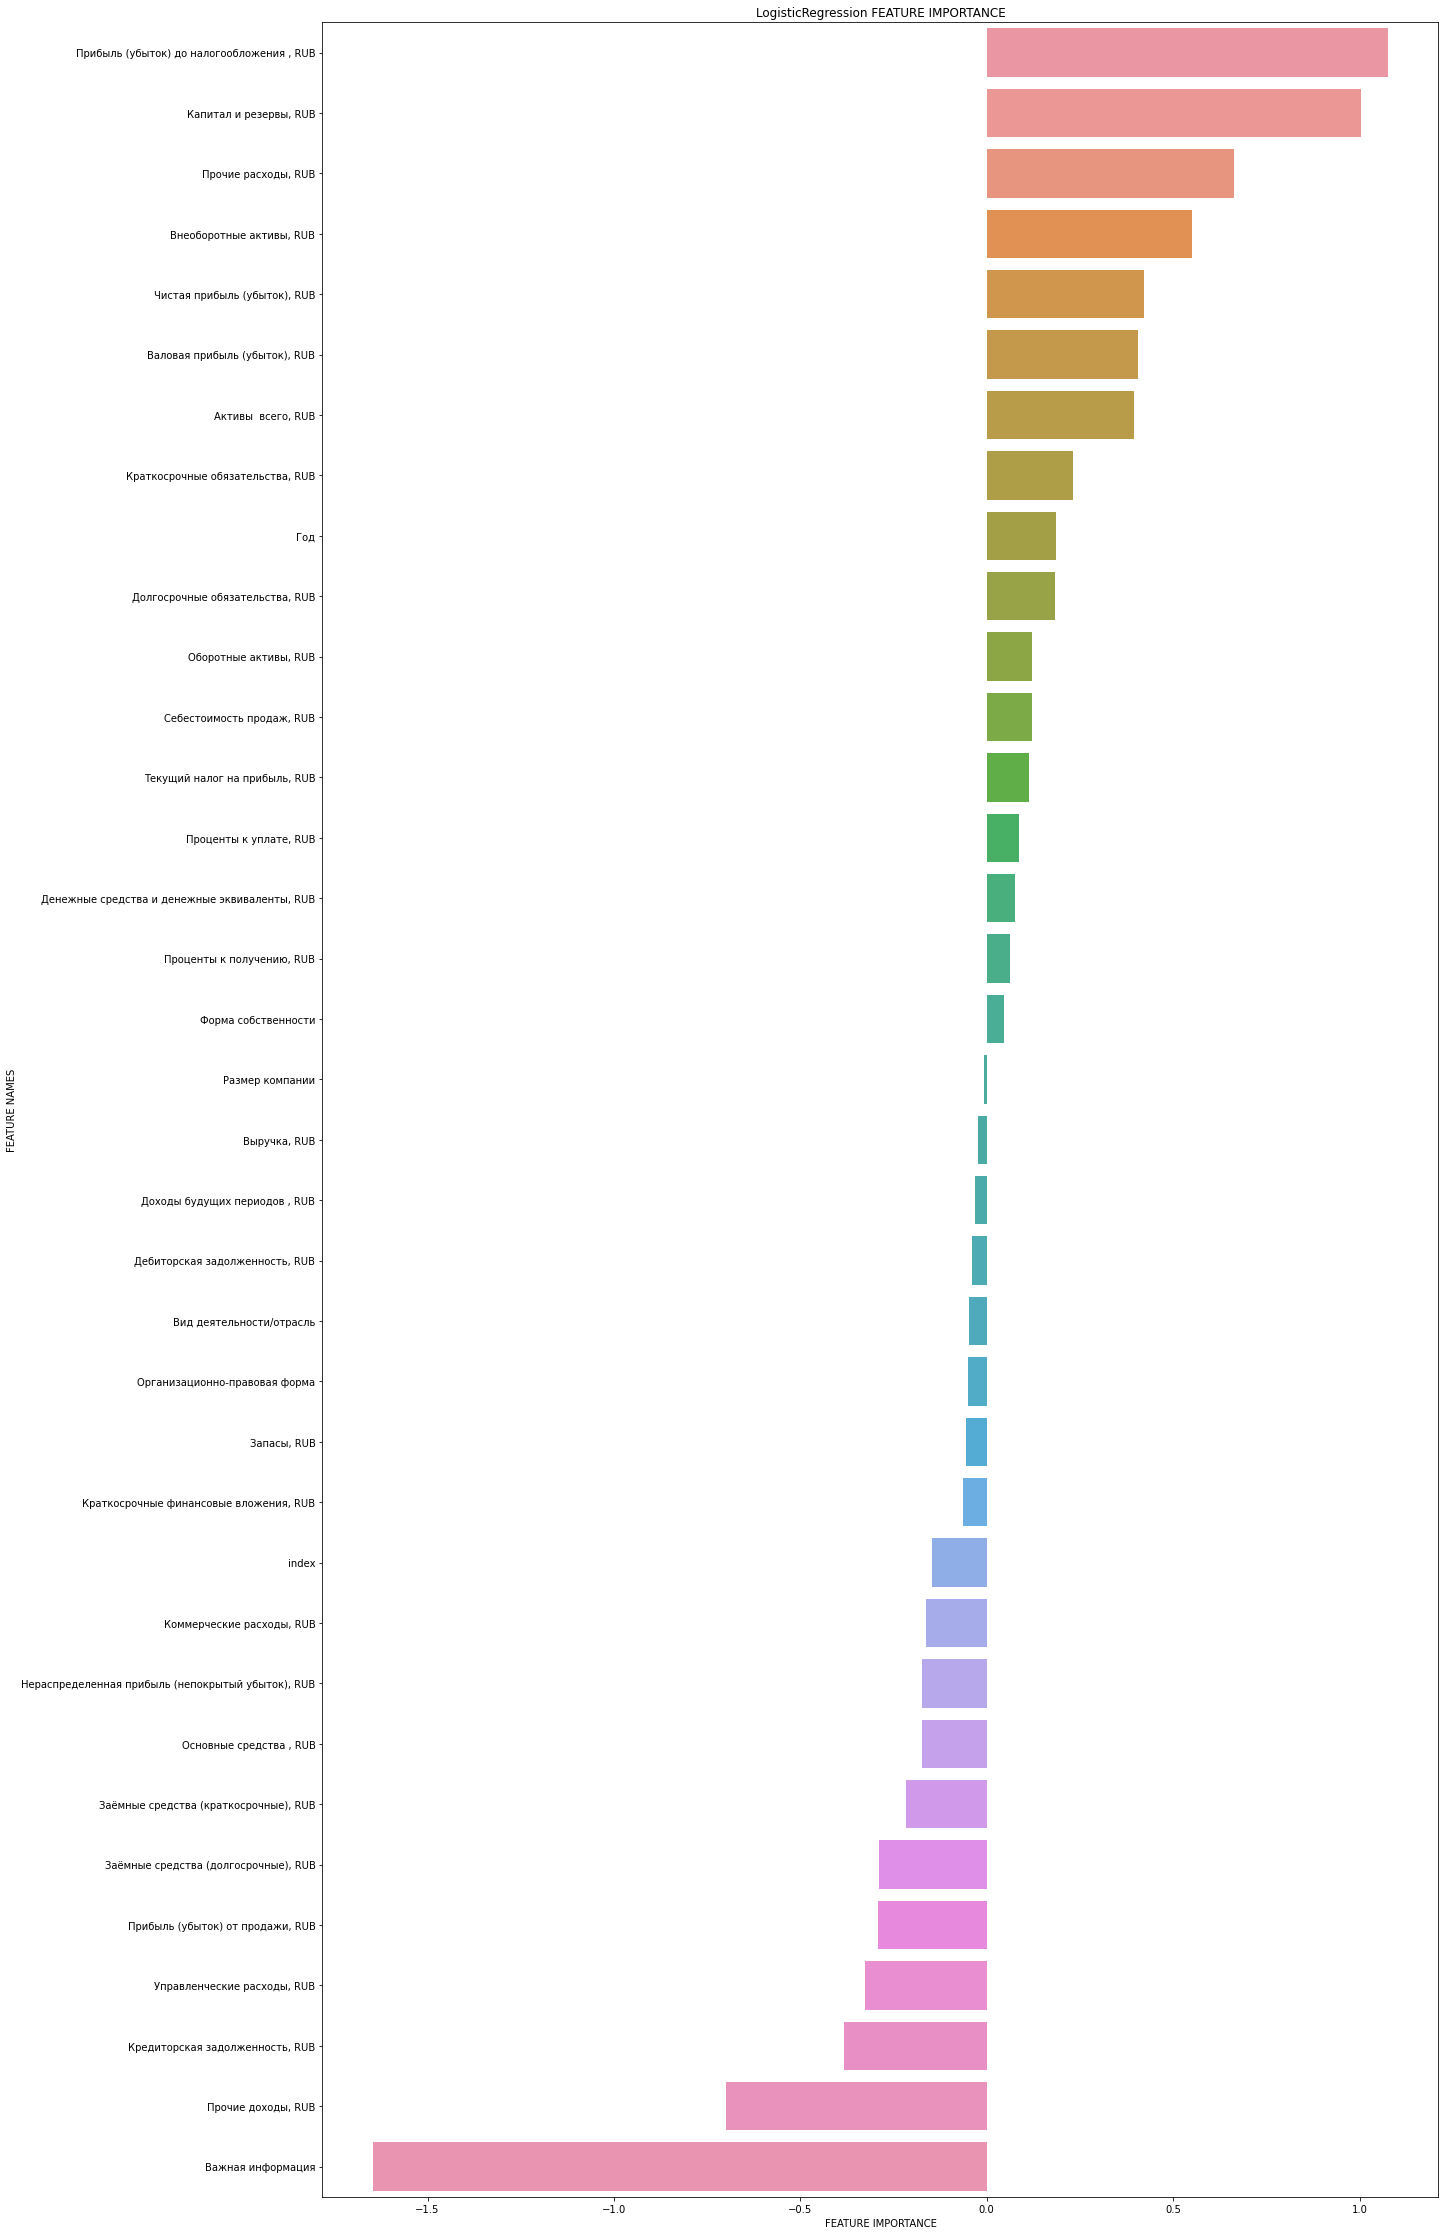

In [ ]:
plot_feature_importance(model.coef_[0], data.drop("Банкротство", axis = 1).columns, "LogisticRegression")